Importing the libraries 

In [181]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial.distance import correlation

Importing the CSV 

In [182]:
excel_file_path = r'C:\Users\khaled\Desktop\Education\GUC Documents\Semester 10\Machine Learning\Assignment 1\Customer data.csv'
df = pd.read_csv(excel_file_path) 
df = df.drop(df.columns[0], axis=1)
print(df.shape)

(2000, 7)


Testing the Eclidean distance Function 

In [183]:
data_points = df.to_numpy()
print(data_points)
Ecluidian_distance = np.linalg.norm(data_points[1] - data_points[2])
print(Ecluidian_distance)

[[     0      0     67 ... 124670      1      2]
 [     1      1     22 ... 150773      1      2]
 [     0      0     49 ...  89210      0      0]
 ...
 [     0      0     31 ...  86400      0      0]
 [     1      1     24 ...  97968      0      0]
 [     0      0     25 ...  68416      0      0]]
61563.005977616136


The Distance Function 

In [184]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):

    num_rows = len(Data_points)
    num_Columns = len(Cluster_Centroids)
    Distance_Matrix = np.zeros((num_rows, num_Columns))
    
    for i in range(num_rows):
        for j in range(num_Columns): 
            if Distance_Type == "Ecluidian distance":
                ecluidian_distance = np.linalg.norm(Data_points[i] - Cluster_Centroids[j])
                Distance_Matrix[i, j] = ecluidian_distance 
            elif Distance_Type == "Pearson correlation distance":
                pearson_distance = 1 - correlation(Data_points[i], Cluster_Centroids[j])
                Distance_Matrix[i, j] = pearson_distance 

    return Distance_Matrix

Testing the GUC_Distance Function 

In [185]:
np.random.seed(42)
data_points = df.to_numpy()
Cluster_Centroids = np.random.random((5, 7))
Cluster_Distance  = GUC_Distance(Cluster_Centroids, data_points, "Ecluidian distance")
print(Cluster_Centroids[0])
print(data_points[0])
Cluster_Distance[0]

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361]
[     0      0     67      2 124670      1      2]


array([124669.86162372, 124669.04774839, 124669.58591418, 124669.23265273,
       124669.95264606])

In [221]:
np.random.seed(42)
Cluster_Centroids = np.zeros((5, data_points.shape[1]))
Final_Cluster_Distance = np.zeros((len(data_points), 4))
Cluster_Metric = np.zeros(Cluster_Centroids.shape[0])
column_ranges = np.ptp(data_points, axis=0)
rows = Cluster_Centroids.shape[0]

for i in range(rows):
    Cluster_Centroids[i, :] = np.random.randint(low=0, high=column_ranges, size=data_points.shape[1])

# The Clustering Loop
j = 1
sum_of_mean_distances_old = 0

while(True):

    if j > 1:
        sum_of_mean_distances_old = sum_of_mean_distances_new

    print("Loop: ",j)

    Cluster_Distance = GUC_Distance( Cluster_Centroids, data_points, "Ecluidian distance" )
    Cluster_index = np.argmin(Cluster_Distance, axis=1)
    min_distance_value = Cluster_Distance[np.arange(Cluster_Distance.shape[0]), Cluster_index]

    # Calculate mean square distance
    square_distances = np.linalg.norm(data_points - Cluster_Centroids[Cluster_index], axis=1)**2


    for i in range(len(data_points)):
        Final_Cluster_Distance[i][0] = i
        Final_Cluster_Distance[i][1] = Cluster_index[i]
        Final_Cluster_Distance[i][2] = min_distance_value[i]
        Final_Cluster_Distance[i][3] = square_distances[i]


    for i in range(Cluster_Centroids.shape[0]):
        cluster_indices = Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0].astype(int)
        cluster_data_points = data_points[Cluster_index]
        Cluster_Centroids[i] = np.mean(data_points[cluster_indices], axis=0) 



    for i in range(Cluster_Centroids.shape[0]):
        Cluster_Metric[i] = np.mean(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 3])

    
    sum_of_mean_distances_new = np.sum(Cluster_Metric)

    print(sum_of_mean_distances_new)
    print(sum_of_mean_distances_old)
    print(sum_of_mean_distances_new - sum_of_mean_distances_old)

    if (abs(sum_of_mean_distances_new - sum_of_mean_distances_old)) <= 10**-3:
        print("Clusters are ready")
        break

    j +=1





Loop:  1
2578142636.6181946
0
2578142636.6181946
Loop:  2
1059282142.9684036
2578142636.6181946
-1518860493.649791
Loop:  3
1003842026.3387436
1059282142.9684036
-55440116.62966001
Loop:  4
1001565981.7390878
1003842026.3387436
-2276044.5996557474
Loop:  5
993184769.2486262
1001565981.7390878
-8381212.490461588
Loop:  6
1019745213.7838877
993184769.2486262
26560444.53526151
Loop:  7
1028527373.3680277
1019745213.7838877
8782159.584139943
Loop:  8
1038167336.4042011
1028527373.3680277
9639963.036173463
Loop:  9
1064468219.4492906
1038167336.4042011
26300883.045089483
Loop:  10
1095604087.6091378
1064468219.4492906
31135868.15984714
Loop:  11
1136863570.0051086
1095604087.6091378
41259482.39597082
Loop:  12
1127917283.58338
1136863570.0051086
-8946286.421728611
Loop:  13
1149125080.9788828
1127917283.58338
21207797.395502806
Loop:  14
1167258519.384263
1149125080.9788828
18133438.40538025
Loop:  15
1169217552.2179594
1167258519.384263
1959032.8336963654
Loop:  16
1172805201.4840474
11692

K-Means Clustering Function 

In [225]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):

   Final_Cluster_Distance = np.zeros((len(Data_points), 4)) 
   Cluster_Metric = np.zeros(Number_of_Clusters)
   column_ranges = np.ptp(Data_points, axis=0)

   for i in range(Number_of_Clusters):
      Cluster_Centroids = np.random.randint(low=0, high=column_ranges, size=(Number_of_Clusters, Data_points.shape[1]))

   # The Clustering Loop
   j = 1
   sum_of_mean_distances_old = 0 
   
   while(True):

    if j>1: 
      sum_of_mean_distances_old = sum_of_mean_distances_new
        
    print("Loop: ",j)

    Cluster_Distance = GUC_Distance( Cluster_Centroids, Data_points, Distance_Type )
    Cluster_index = np.argmin(Cluster_Distance, axis=1)
    min_distance_value = Cluster_Distance[np.arange(Cluster_Distance.shape[0]), Cluster_index]

    # Calculate mean square distance
    square_distances = np.linalg.norm(Data_points - Cluster_Centroids[Cluster_index], axis=1)**2


    for i in range(len(Data_points)):
      Final_Cluster_Distance[i][0] = i
      Final_Cluster_Distance[i][1] = Cluster_index[i]
      Final_Cluster_Distance[i][2] = min_distance_value[i]
      Final_Cluster_Distance[i][3] = square_distances[i]


    for i in range(Number_of_Clusters):
      cluster_indices = Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 0].astype(int)
      Cluster_Centroids[i] = np.mean(Data_points[cluster_indices], axis=0) 



    for i in range(Number_of_Clusters):
      Cluster_Metric[i] = np.mean(Final_Cluster_Distance[Final_Cluster_Distance[:, 1] == i, 3])

    
    sum_of_mean_distances_new = np.sum(Cluster_Metric)

    print(sum_of_mean_distances_new - sum_of_mean_distances_old)

    if abs(sum_of_mean_distances_new - sum_of_mean_distances_old) <= 10**-3:
        print("Clusters are ready")
        break


    j +=1 
    
   return [ Final_Cluster_Distance , Cluster_Metric ]

Helper Display Function 

In [223]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [189]:
def apply_kmeans_and_plot(data, Number_of_clusters, distance_type):
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(data, Number_of_clusters, distance_type)

    # Extract cluster index and centroids from Final_Cluster_Distance
    cluster_index = Final_Cluster_Distance[:, 1].astype(int)
    centroids = np.array([np.mean(data[cluster_index == i], axis=0) for i in range(Number_of_clusters)])

    # Display results
    display_cluster(data, cluster_index, centroids,
                    title=f'Number of Clusters: {Number_of_clusters}, Distance Type: {distance_type}')

Loop:  1
nan
Loop:  2
nan
Loop:  3
nan
Loop:  4
nan
Loop:  5
nan
Loop:  6
nan
Loop:  7
nan
Loop:  8
nan
Loop:  9
nan
Loop:  10
nan
Loop:  11
nan
Loop:  12
nan
Loop:  13
nan
Loop:  14
nan
Loop:  15
nan
Loop:  16
nan
Loop:  17
nan
Loop:  18
nan
Loop:  19
nan
Loop:  20
nan
Loop:  21
nan
Loop:  22
nan
Loop:  23
nan
Loop:  24
nan
Loop:  25
nan
Loop:  26
nan
Loop:  27
nan
Loop:  28
nan
Loop:  29
nan
Loop:  30
nan
Loop:  31
nan
Loop:  32
nan
Loop:  33
nan
Loop:  34
nan
Loop:  35
nan
Loop:  36
nan
Loop:  37
nan
Loop:  38
nan
Loop:  39
nan
Loop:  40
nan
Loop:  41
nan
Loop:  42
nan
Loop:  43
nan
Loop:  44
nan
Loop:  45
nan
Loop:  46
nan
Loop:  47
nan
Loop:  48
nan
Loop:  49
nan
Loop:  50
nan
Loop:  51
nan
Loop:  52
nan
Loop:  53
nan
Loop:  54
nan
Loop:  55
nan
Loop:  56
nan
Loop:  57
nan
Loop:  58
nan
Loop:  59
nan
Loop:  60
nan
Loop:  61
nan
Loop:  62
nan
Loop:  63
nan
Loop:  64
nan
Loop:  65
nan
Loop:  66
nan
Loop:  67
nan
Loop:  68
nan
Loop:  69
nan
Loop:  70
nan
Loop:  71
nan
Loop:  72
nan
L

C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\khaled\AppData\Local\Temp\ipykernel_14116\4140102020.py:38: RuntimeWarning: invalid value encountered in cast
  Cluster_Centroids[i] = np.mean(Data_points[cluster_indices], axis=0)
C:\Users\khaled\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan
Loop:  1523
nan
Loop:  1524
nan
Loop:  1525
nan
Loop:  1526
nan
Loop:  1527
nan
Loop:  1528
nan
Loop:  1529
nan
Loop:  1530
nan
Loop:  1531
nan
Loop:  1532
nan
Loop:  1533
nan
Loop:  1534
nan
Loop:  1535
nan
Loop:  1536
nan
Loop:  1537
nan
Loop:  1538
nan
Loop:  1539
nan
Loop:  1540
nan
Loop:  1541
nan
Loop:  1542
nan
Loop:  1543
nan
Loop:  1544
nan
Loop:  1545
nan
Loop:  1546
nan
Loop:  1547
nan
Loop:  1548
nan
Loop:  1549
nan
Loop:  1550
nan
Loop:  1551
nan
Loop:  1552
nan
Loop:  1553
nan
Loop:  1554
nan
Loop:  1555
nan
Loop:  1556
nan
Loop:  1557
nan
Loop:  1558
nan
Loop:  1559
nan
Loop:  1560
nan
Loop:  1561
nan
Loop:  1562
nan
Loop:  1563
nan
Loop:  1564
nan
Loop:  1565
nan
Loop:  1566
nan
Loop:  1567
nan
Loop:  1568
nan
Loop:  1569
nan
Loop:  1570
nan
Loop:  1571
nan
Loop:  1572
nan
Loop:  1573
nan
Loop:  1574
nan
Loop:  1575
nan
Loop:  1576
nan
Loop:  1577
nan
Loop:  1578
nan
Loop:  1579
nan
Loop:  1580
nan
Loop:  1581
nan
Loop:  1582
nan
Loop:  1583
nan
Loop:  1584
nan
Loop

KeyboardInterrupt: 

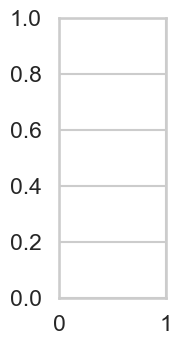

In [226]:
# prepare the figure sise and background 
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Produce a data set that represents the x and y coordinates of a circle 
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
X_example1 = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()

for i, num_clusters in enumerate(range(2, 11)):
    plt.subplot(2, 5, i+1)

    # Apply GUC_Kmean function
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X_example1, num_clusters, 'euclidean')

    # Extract cluster index and centroids from Final_Cluster_Distance
    cluster_index = Final_Cluster_Distance[:, 1].astype(int)
    centroids = np.array([np.mean(X_example1[cluster_index == j], axis=0) for j in range(num_clusters)])

    # Display results using your display_cluster function
    display_cluster(X_example1, km=None, num_clusters=num_clusters)
    plt.title(f'Number of Clusters: {num_clusters}')

plt.tight_layout()
plt.show()


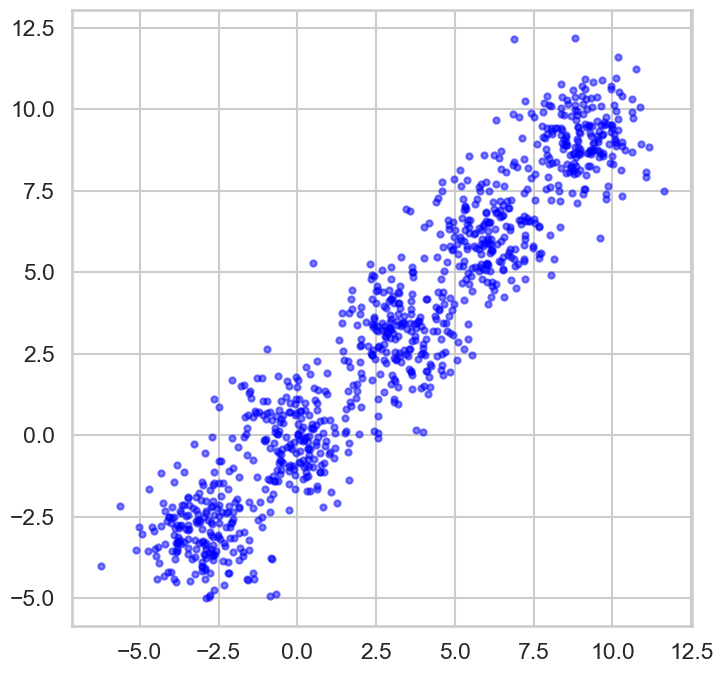

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

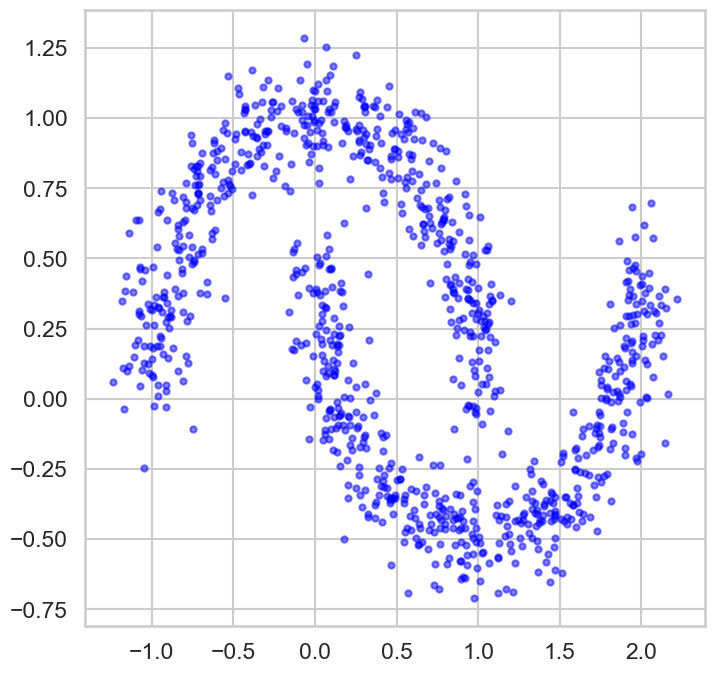

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)